<center><h1>Sales Prediction-Multiple Linear Regression</h1></center>


# Load The Data and Create a DataFrame

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing

**Printing first 5 rows**

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


**Printing last 5 rows**

In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


**Printing datatypes of each column**

In [ ]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

**Printing the total missing value**

In [ ]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Dsecribe the data**

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


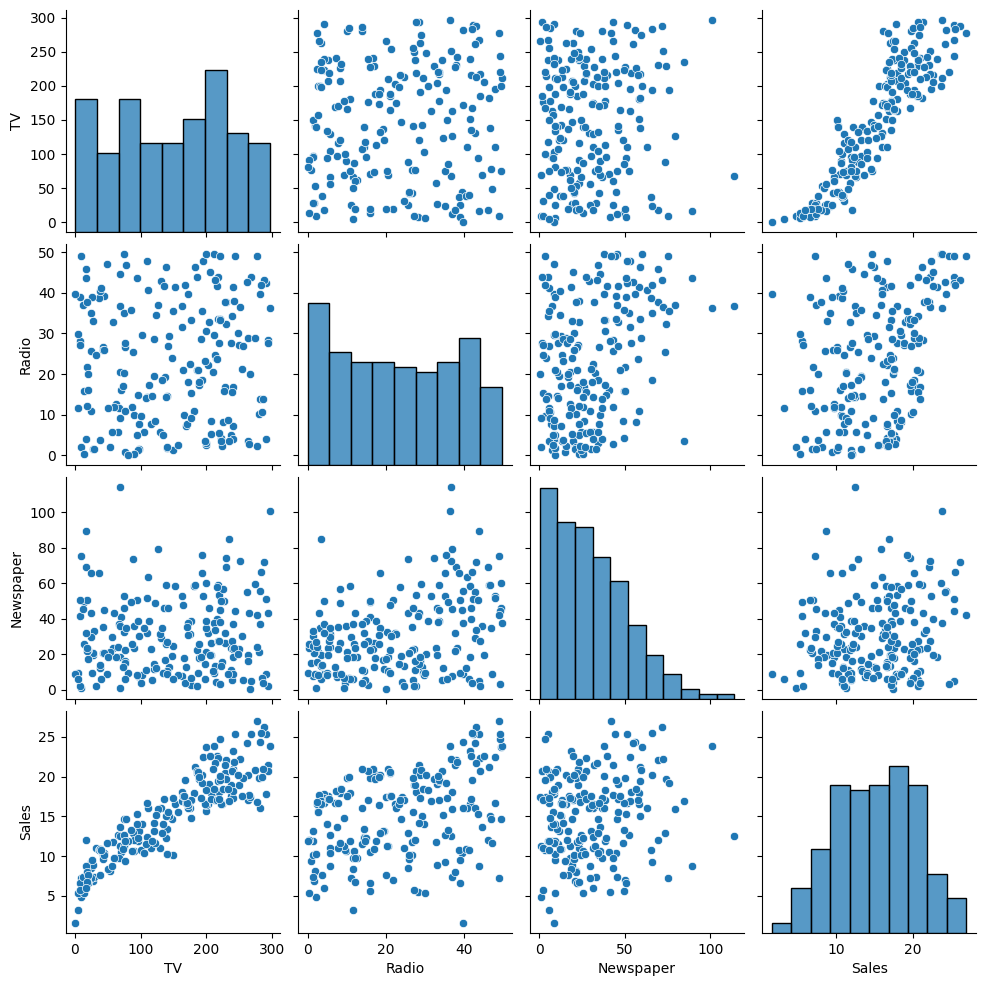

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)
plt.show()

**Correlation Heatmap of Variables**

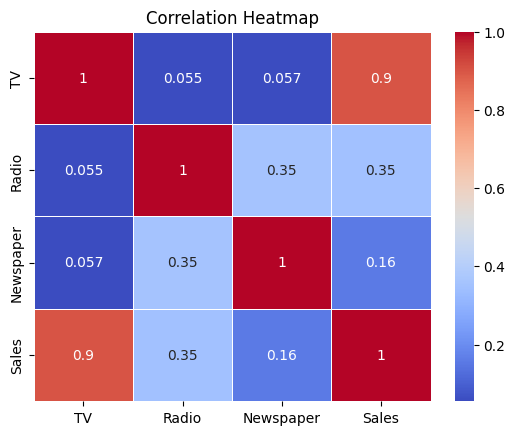

In [ ]:

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Seperate x as input feature**

In [ ]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


**y as class label**

In [ ]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

**Relationship between TV Advertising and Sales**

Text(0.5, 1.0, 'TV Vs Sales')

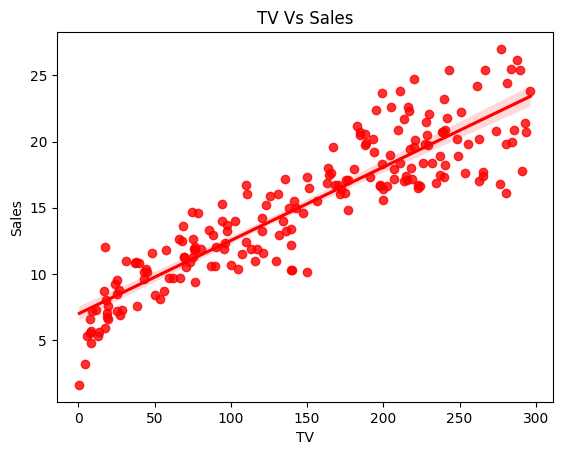

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['TV'],y=y,color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV Vs Sales')

**Relationship between Radio Advertising and Sales**

Text(0.5, 1.0, 'Radio Vs Sales')

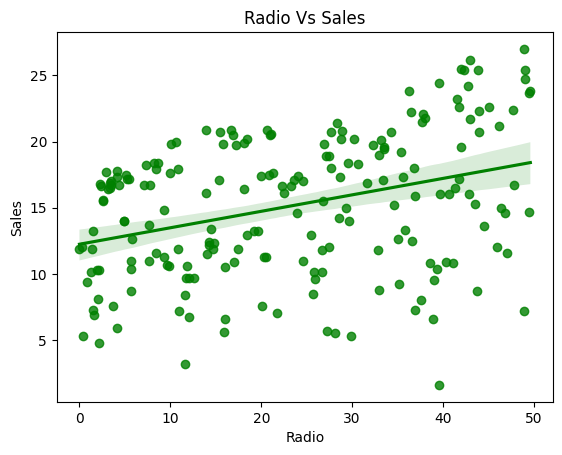

In [ ]:
sns.regplot(x=df['Radio'],y=y,color='green')
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio Vs Sales")

**Relationship between Newspaper Advertising and Sales**

Text(0.5, 1.0, 'Newspaper Vs Sales')

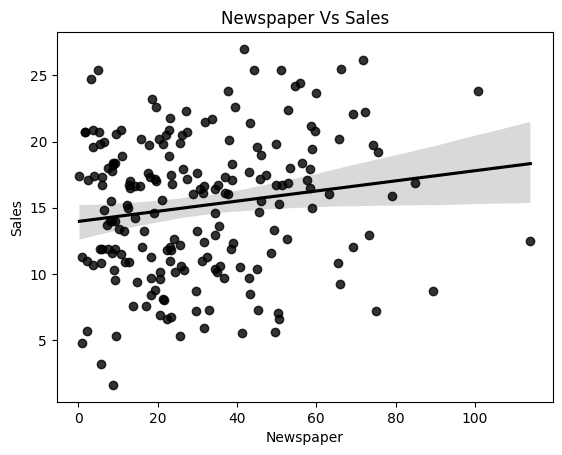

In [ ]:
sns.regplot(x=df['Newspaper'],y=y,color='black')
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper Vs Sales")


**Split the data into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [ ]:
x_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [ ]:
y_train

169    20.0
97     20.5
31     11.9
12      9.2
35     17.8
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 140, dtype: float64

In [ ]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    16.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     16.7
Name: Sales, dtype: float64

# Model Creation

**Model creation using LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

**Create dataframe using actual value,predicted value,and the difference between them**

In [ ]:
df1=pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':y_pred,'Difference':y_test-y_pred})

In [ ]:
df1

,Actual_Value,Predicted_Value,Difference
95,16.9,17.159919,-0.259919
15,22.4,20.533695,1.866305
30,21.4,23.689144,-2.289144
158,7.3,9.519146,-2.219146
128,24.7,21.607368,3.092632
115,12.6,12.781013,-0.181013
69,22.3,21.086363,1.213637
170,8.4,8.760542,-0.360542
174,16.5,17.115000,-0.615000
45,16.1,16.687896,-0.587896


**Residual Plot of Predicted Vs Actual Value**

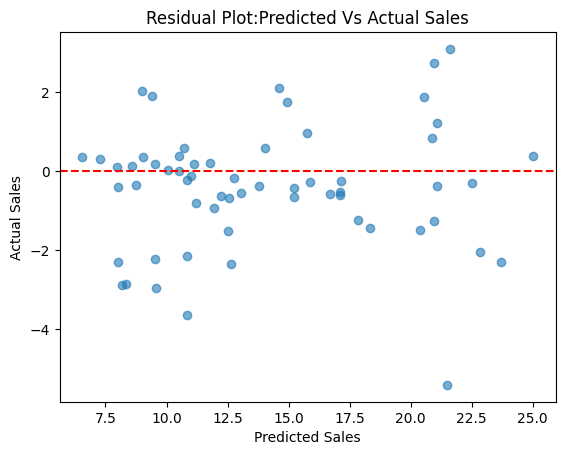

In [ ]:
residuals = y_test-y_pred
plt.scatter(y_pred, residuals,alpha=0.6)
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Residual Plot:Predicted Vs Actual Sales')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


**Histogram of Residuals**

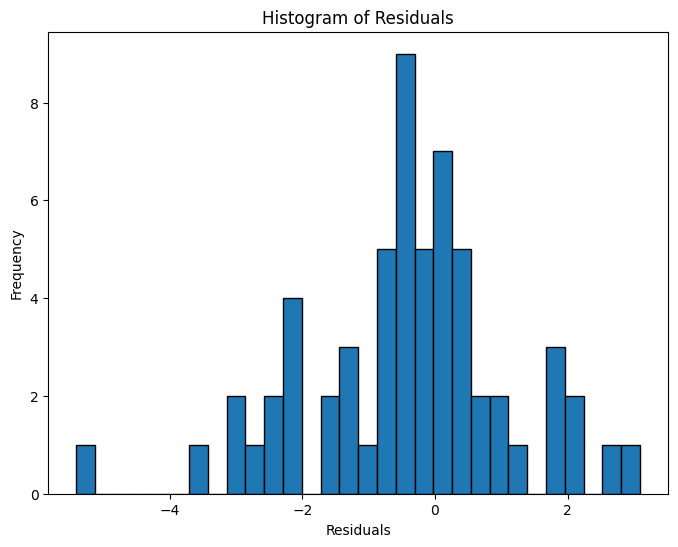

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(residuals,bins=30,edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

**Comparison of Actual Values and Predicted Values**

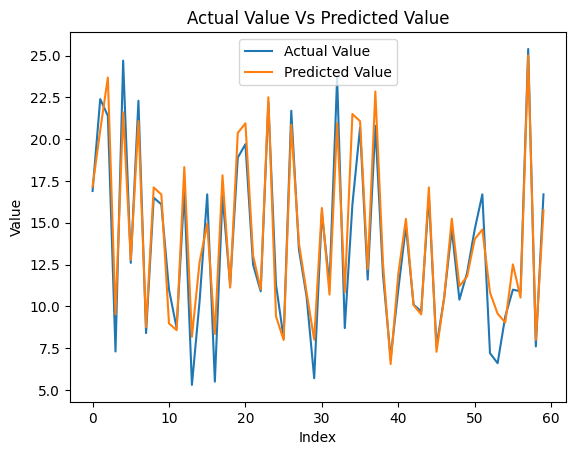

In [ ]:
plt.plot(range(len(y_test)),y_test,label='Actual Value')
plt.plot(range(len(y_test)),y_pred,label='Predicted Value')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual Value Vs Predicted Value')
plt.legend()
plt.show()

**Print slope and y intercept**

In [ ]:
print("slpe is")
print(list(zip(x,model.coef_)))
print("y intercept is")
print(model.intercept_)


slpe is
[('TV', 0.05358869132706914), ('Radio', 0.10270676778771287), ('Newspaper', 0.007931667677316324)]
y intercept is
4.743766701589685


**Coefficient Plot for Multiple Linear Regression**

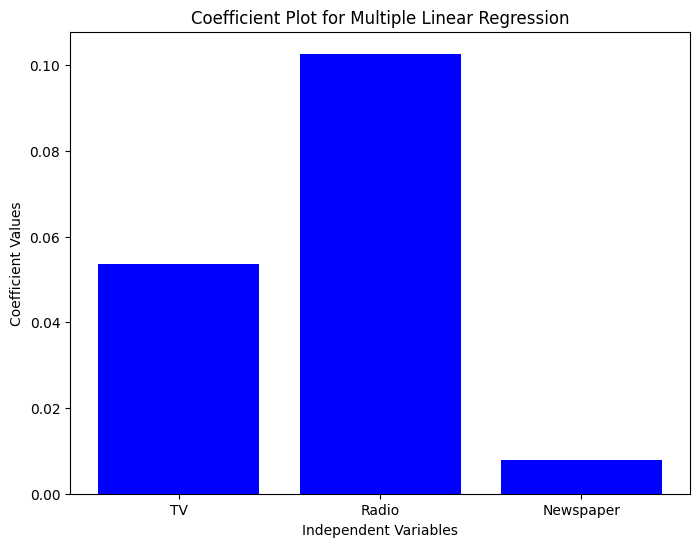

In [ ]:
coefficients = [0.05358869132706914, 0.10270676778771287, 0.007931667677316324]
independent_variables = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(8, 6))
plt.bar(independent_variables, coefficients, color=['b' if coef > 0 else 'r' for coef in coefficients])
plt.xlabel('Independent Variables')
plt.ylabel('Coefficient Values')
plt.title('Coefficient Plot for Multiple Linear Regression')
plt.show()


# Performance Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

In [ ]:
print("Mean Absolute Error",mae)
print("Mean Absolute Percentage Error",mape)
print("Mean Squared Error",mse)
print("Root Mean Squared Error",rmse)
print("R2 Score",score)


Mean Absolute Error 1.1594875061090582
Mean Absolute Percentage Error 0.10536440823029307
Mean Squared Error 2.541624036229147
Root Mean Squared Error 1.5942471691143587
R2 Score 0.9091484341849799


In [ ]:
!sudo apt-get update
!sudo apt-get install texlive-xetex


Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [734 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [731 kB]
Fetched 1,802 kB in 5s (400 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvg

In [ ]:
!jupyter nbconvert --to pdf '/content/multiple_linear_regression(advertising)_.ipynb'


[NbConvertApp] Converting notebook /content/multiple_linear_regression(advertising)_.ipynb to pdf
[NbConvertApp] Support files will be in multiple_linear_regression(advertising)__files/
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Making directory ./multiple_linear_regression(advertising)__files
[NbConvertApp] Writing 53749 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbCon